# 계층적 클러스터링

계층적 클러스터링(Hierarchical clustering)은 클러스터 갯수를 미리 정해놓지 않고 가장 유사도가 높은 데이터 샘플 집단을 합치면서 클러스트 갯수를 줄이거나(Agglomerative Clustering) 나누면서(Divisive Clustering) 클러스트 갯수를 늘리는 방식을 말한다.

* Agglomerative Clustering
 * 처음에는 데이터 샘플 하나 당 하나의 클러스터로 보고 가장 유사도가 높은 클러스터를 합치면서 클러스터 갯수를 줄여 간다.
 -전체 데이터의 유사성 행렬을 구한다. 각 데이터를 하나의 클러스터로 보고 가장 가까운 두 클러스터를 묶어 한 클러스터로 한다. 새롭게 형성된 클러스터를 포함한 전체 클러스터간의 유사성 행렬을 구한다. 클러스터의 수가 1개가 될 때까지 계속한다.

* Divisive Clustering
 * 처음에는 모든 데이터 샘플의 집합을 하나의 클러스터로 보고 가장 유사도가 떨어지는 클러스터 집단으로 나누면서 클러스터 갯수를 늘리는 방식

## 클러스터간의 유사도 측정

클러스터간의 유사도 혹은 거리를 측정하는 방법에는 다음과 같은 것이 있다.

### centroid
두 클러스터의 중심점(centroid)를 정의한 다음 두 중심점의 거리로 측정.  여기서 말하는 거리는 클러스터간의 거리다. 데이터간 거리 아니다.
$$
   d(u,v) = \|c_u - c_v\|^2
$$
여기에서  $c_u$ 와 $c_v$ 는 각각 두 클러스터 $u$ 와 $v$ 의 중심점이다.

### median
이 방법은 Agglomerative Clustering 에서 사용할 수 있는 귀납적 방법으로 centroid 방법의 변형이다.  만약 클러스터 $u$가 클러스터 $s$와 클러스터 $t$가 결합하여 생겼다면 클러스터 $u$의 중심점은 새로 계산하지 않고 원래 클러스터의 두 클러스터의 중심점의 평균을 사용한다.

### single
클러스터 $u$의 모든 데이터 $i$와 클러스터 $v$의 모든 데이터 $j$의 모든 조합에 대해 거리를 측정해서 최소값을 구한다. 최소 거리(Nearest Point) 방법이라고도 한다. K-means ++ 과 유사하다.
$$
   d(u,v) = \min(dist(u[i],v[j]))
$$

-최단연결법이라고 한다. 가장 가까이 있는 두 관측치 사이의 거리.


### complete
클러스터 $u$의 모든 데이터 $i$와 클러스터 $v$의 모든 데이터 $j$의 모든 조합에 대해 거리를 측정한 후 가장 큰 값을 구한다. Farthest Point
Algorithm 또는  Voor Hees Algorithm 이라고도 한다.
$$
   d(u, v) = \max(dist(u[i],v[j]))
$$

-최장연결법이라고 한다. 가장 멀리 떨어진 두 관측치 사이 거리. 
### average
클러스터 $u$의 모든 데이터 $i$와 클러스터 $v$의 모든 데이터 $j$의 모든 조합에 대해 거리를 측정한 후 평균을 구한다. $|u|$와 $|v|$는 각각 두 클러스터의 원소의 갯수를 뜻한다.
$$
   d(u,v) = \sum_{ij} \frac{d(u[i], v[j])}{(|u||v|)}
$$

### weighted

이 방법은 Agglomerative Clustering 에서 사용할 수 있는 귀납적 방법이다. 만약 클러스터 $u$가 클러스터 $s$와 클러스터 $t$가 결합하여 생겼다면 
다음과 같이 원래 클러스터까지의 두 거리의 평균을 사용한다.

$$
   d(u,v) = (dist(s,v) + dist(t,v))/2
$$

### Ward
이 방법은 Agglomerative Clustering 에서 사용할 수 있는 귀납적 방법이다. 만약 클러스터 $u$가 클러스터 $s$와 클러스터 $t$가 결합하여 생겼다면 
다음과 같이 두 클러스터의 거리의 가중 평균에서 원래의 두 클래스터 사이의 거리를 보정한 값을 사용한다. 보통 디폴트 값이다. weighted와 비슷하다.
$$
   d(u,v) = \sqrt{\frac{|v|+|s|}{|v|+|s|+|t|}d(v,s)^2 + \frac{|v|+|t|}{|v|+|s|+|t|}d(v,t)^2 - \frac{|v|}{|v|+|s|+|t|}d(s,t)^2}
$$
이 식에서 $|\cdot|$ 기호는 클러스터의 원소의 갯수를 말한다. 





## Scikit-Learn의 계층적 클러스터링

Scikit-Learn 의 cluster 서브패키지는 계층적 클러스터링을 위한 `AgglomerativeClustering` 클래스를 지원한다.

Compute structured hierarchical clustering...
Elapsed time:  1.314204216003418
Number of pixels:  7752
Number of clusters:  10


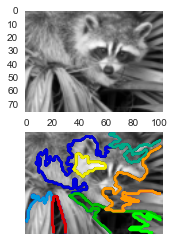

In [1]:
import time
from sklearn.feature_extraction.image import grid_to_graph   #connectivity 정보를 담고 있다?
from sklearn.cluster import AgglomerativeClustering

###############################################################################
# Generate data
try:
    face = sp.face(gray=True)
except AttributeError:
    # Newer versions of scipy have face in misc
    from scipy import misc
    face = misc.face(gray=True)

# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255.
X = np.reshape(face, (-1, 1))

###############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*face.shape)

###############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 10  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, face.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

###############################################################################
# Plot the results on an image
plt.subplot(211)
plt.imshow(face, cmap=plt.cm.gray)
plt.grid(False)
plt.subplot(212)
plt.imshow(face, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

## SciPy의 계층적 클러스터링

* [sp.cluster.hierarchy.linkage](http://docs.sp.org/doc/scipy/reference/generated/sp.cluster.hierarchy.linkage.html)
 * Agglomerative 방식 클러스터링
 
 
* [sp.cluster.hierarchy.dendrogram](http://docs.sp.org/doc/scipy/reference/generated/sp.cluster.hierarchy.dendrogram.html) 
 * 클러스터링 결과를 tree 형태로 시각화
 
 
* 참고 자료
 * https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Perform-the-Hierarchical-Clustering

(150, 2)


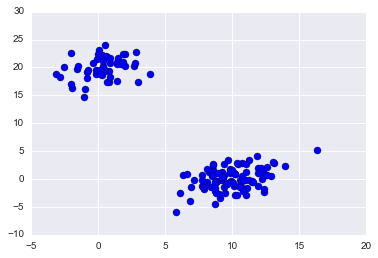

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram   
np.set_printoptions(precision=5, suppress=True) 

np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)

plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

In [3]:
Z = linkage(X, 'ward')

In [4]:
Z[30:40]   #순서대로 원래 데이터에 있는 인덱스를 가리킨다. 2번째의 경우 14번과 79번 클러스터가 합쳐져서 데이터 2개가 들어있다. 
#기존에는 클러스터가 생략 된 것이 1개, 밑으로는 클러스터 2개. 밑에 152 나온 것은 2번째 계층의 클러스터. 그래서 3개
# 14번과 79번 합쳐져서 151번째 클러스터가 새로 만들어진것이다.
# 하나의 리스트는 클러스터를 나타낸다.

array([[  76.     ,   99.     ,    0.29709,    2.     ],
       [  47.     ,   59.     ,    0.29906,    2.     ],
       [   5.     ,   91.     ,    0.3392 ,    2.     ],
       [  90.     ,  181.     ,    0.33976,    3.     ],
       [ 124.     ,  143.     ,    0.34521,    2.     ],
       [  43.     ,   55.     ,    0.34593,    2.     ],
       [  51.     ,   64.     ,    0.34655,    2.     ],
       [  54.     ,   97.     ,    0.35581,    2.     ],
       [   2.     ,   93.     ,    0.37556,    2.     ],
       [ 100.     ,  160.     ,    0.38091,    3.     ]])

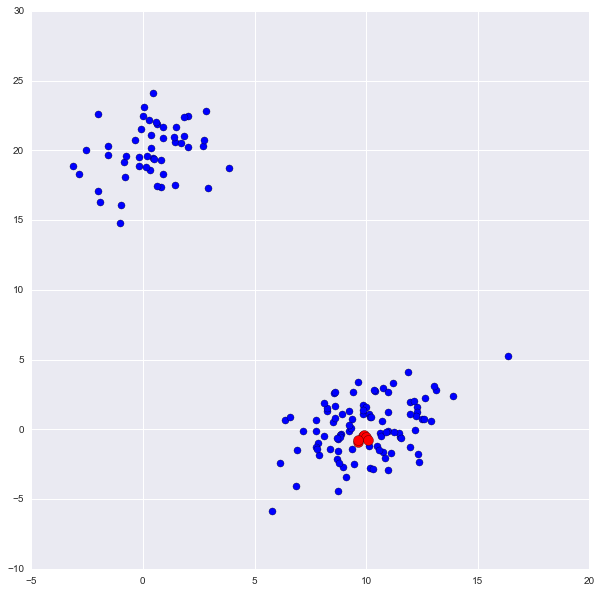

In [5]:
idxs = [33, 68, 62, 82, 63, 98]
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], s=50)
plt.scatter(X[idxs,0], X[idxs,1], c='r', s=100) 
plt.show()

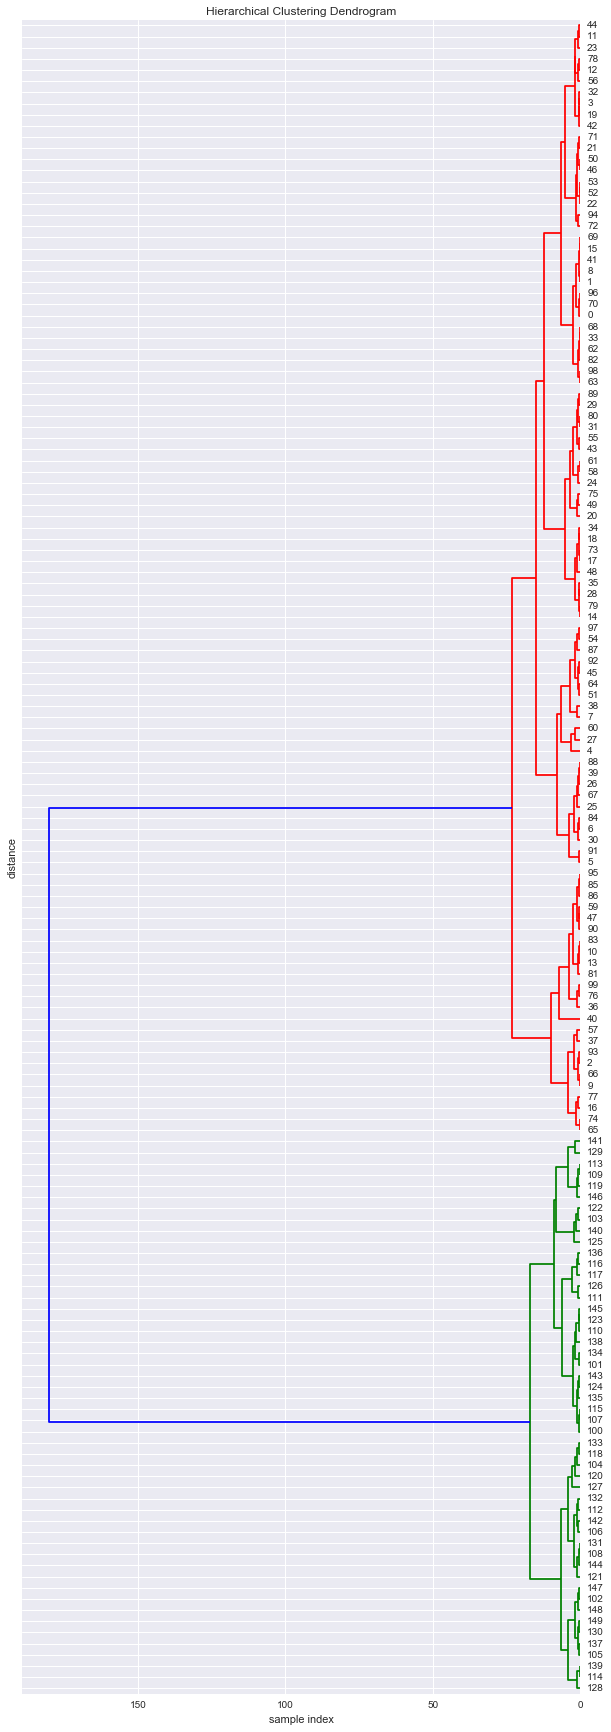

In [6]:
plt.figure(figsize=(10,30))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z, #3, "level", show_leaf_counts=False,
    leaf_font_size=10,  # font size for the x axis labels
    orientation='left'
);